In [1]:
import keras
import os
import librosa


import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\lenovo_pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
feature_dim_1 = 3

In [3]:
def get_labels(path):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))    
    return labels, label_indices, to_categorical(label_indices)





In [4]:


def save_data_to_array(path, max_pad_len):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        melspectrogram_vectors = []

        wavfiles = [path + '/' + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        #wavfiles = librosa.util.find_files(db)
        #print(wavfiles)
        x=0
        for wavfile in wavfiles:
            name=label+'_'+str(x)
            melspectrogram = wav2melspectrogram(wavfile, name, max_pad_len=max_pad_len)            
            melspectrogram_vectors.append(melspectrogram)            
            x=x+1
        
        #computing PCA and saving
        
        np.save(label + '.npy', melspectrogram_vectors)
        #y=np.load(label + '.npy')
        #y = sklearn.preprocessing.scale(y)
        #y.mean()
        #model = sklearn.decomposition.PCA(n_components=2, whiten=True)
        #model.fit(y)
        #y = model.transform(y)
        #pd.DataFrame(y).to_csv(VALUE_PATH+'/'+label+'.csv')
        
        
sample_x=[]

def wav2melspectrogram(file_path, name, max_pad_len):
    wave, sr = librosa.load(file_path)
    x = librosa.feature.mfcc(wave, sr=sr)
    pad_width = max_pad_len - x.shape[1]
    x = np.pad(x, pad_width=((0, 0), (0, pad_width)), mode='constant')
    #here the dimensions are getting reduced 
    #through PCA decompostion
    x = reduce_dimension(x)    
    return x.T

In [5]:
DATA_PATH = r'C:\Users\lenovo_pc\Desktop\CNN_SR\Dataset-merged'

# t-Distributed Stochastic Neighbour Embedding (t-SNE)
Like PCA, t-SNE is another dimensionality reduction technique, developed in part by the godfather of machine learning himself, Geoffrey Hinton. Quoting Wikipedia : It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

labels, indices, _ = get_labels(DATA_PATH)

 Getting first arrays
T = np.load(labels[0] + '.npy')
 Getting first element of first array
X = T[127]
print(X.shape)

 Running t-SNE generating 3 dimensional data points
print("Calculating TSNE")
tsne = TSNE(n_components=3, perplexity=40, verbose=2, n_iter=500,early_exaggeration=1)
tsne0 = tsne.fit_transform(X.T)
tsne0 = StandardScaler().fit_transform(tsne0)

print(tsne0.T.shape)


In [6]:
def reduce_dimension(X):
    tsne = TSNE(n_components=feature_dim_1, perplexity=40, verbose=2, n_iter=500,early_exaggeration=1)
    tsne0 = tsne.fit_transform(X.T)
    tsne0 = StandardScaler().fit_transform(tsne0)
    
    return tsne0.T

In [7]:
from sklearn.model_selection import train_test_split


def get_train_test(split_ratio=0.8, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)

    # Getting first arrays
    X = np.load(labels[0] + '.npy')
    # print(X.shape[0]) returns: 129
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        #print(X.shape[0]) returns: 129+152=281
        #print(i) returns: 0: So all y values are 1 for Seven and 0 for Tin
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)



In [8]:




# Second dimension of the feature is dim2
feature_dim_2 = 28

# Save data to array file first
save_data_to_array(DATA_PATH,feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 2


y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.172s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.057s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 300: error = 0.6237605, gradient norm = 0.0000464 (50 iterations in 0.038s)
[t-SNE] Iteration 350: error = 0.6203403, gradient norm = 0.0000392 (50 iterations in 0.028s)
[t-SNE] Iteration 400: error = 0.6165357, gradient norm = 0.0000317 (50 iterations in 0.025s)
[t-SNE] Iteration 450: error = 0.6130626, gradient norm = 0.0000256 (50 iterations in 0.025s)
[t-SNE] Iteration 500: error = 0.6099716, gradient norm = 0.0000210 (50 iterations in 0.028s)
[t-SNE] Error after 500 iterations: 0.609972
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.566586
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 0.7335868, gradient norm = 0.0005764 (50 iterations in 0.037s)
[t-SNE] Iteration 100: error = 0.6652541, gradient norm = 0.0001909 (50 iterations in 0.026s)
[t-SNE] Iteratio

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.043s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.060s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.113s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.044s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.036s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.035s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 250: error = 0.5213615, gradient norm = 0.0000498 (50 iterations in 0.031s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.521361
[t-SNE] Iteration 300: error = 0.5200601, gradient norm = 0.0000463 (50 iterations in 0.033s)
[t-SNE] Iteration 350: error = 0.5172455, gradient norm = 0.0000391 (50 iterations in 0.023s)
[t-SNE] Iteration 400: error = 0.5144521, gradient norm = 0.0000316 (50 iterations in 0.029s)
[t-SNE] Iteration 450: error = 0.5116658, gradient norm = 0.0000255 (50 iterations in 0.040s)
[t-SNE] Iteration 500: error = 0.5091428, gradient norm = 0.0000208 (50 iterations in 0.037s)
[t-SNE] Error after 500 iterations: 0.509143
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.032s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.034s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabiliti

[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.030s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.030s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient 

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.032s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabiliti

[t-SNE] Iteration 300: error = 0.6144916, gradient norm = 0.0000507 (50 iterations in 0.030s)
[t-SNE] Iteration 350: error = 0.6127263, gradient norm = 0.0000427 (50 iterations in 0.037s)
[t-SNE] Iteration 400: error = 0.6118867, gradient norm = 0.0000340 (50 iterations in 0.052s)
[t-SNE] Iteration 450: error = 0.6084340, gradient norm = 0.0000271 (50 iterations in 0.065s)
[t-SNE] Iteration 500: error = 0.6048754, gradient norm = 0.0000220 (50 iterations in 0.042s)
[t-SNE] Error after 500 iterations: 0.604875
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.049s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iteratio

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.022s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 50: gradi

[t-SNE] Computed neighbors for 28 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.034s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (

[t-SNE] Iteration 250: error = 0.5220202, gradient norm = 0.0000509 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.522020
[t-SNE] Iteration 300: error = 0.5209434, gradient norm = 0.0000475 (50 iterations in 0.031s)
[t-SNE] Iteration 350: error = 0.5178820, gradient norm = 0.0000401 (50 iterations in 0.029s)
[t-SNE] Iteration 400: error = 0.5131013, gradient norm = 0.0000324 (50 iterations in 0.027s)
[t-SNE] Iteration 450: error = 0.5078484, gradient norm = 0.0000259 (50 iterations in 0.030s)
[t-SNE] Iteration 500: error = 0.5024519, gradient norm = 0.0000210 (50 iterations in 0.033s)
[t-SNE] Error after 500 iterations: 0.502452
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 7.480403
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 0.5319002, gradient norm = 0.0004356 (50 iterations in 0.033s)
[t-SNE] Iteration 100: error = 0.4904313, gradient norm = 0.0001734 (50 iterations in 0.028s)
[t-SNE] Iteration 150: error = 0.4818097, gradient norm = 0.0001000 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 0.4786838, gradient norm = 0.0000676 (50 iterations in 0.049s)
[t-SNE] Iteration 250: error = 0.4765301, gradient norm = 0.0000498 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.476530
[t-SNE] Iteration 300: error = 0.4759043, gradient norm = 0.0000464 (50 iterations in 0.053s)
[t-SNE] Iteration 350: error = 0.4744968, gradient norm = 0.0000391 (50 iterati

[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[

[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 21.049510
[t-SNE] Computed conditional probabilities in 0.004s
[

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 29.925216
[t-SNE] Computed conditional probabilities in 0.005s
[

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 21.077960
[t-SNE] Computed conditional probabilities in 0.00

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 250: error = 0.4878203, gradient norm = 0.0000639 (50 iterations in 0.038s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.487820
[t-SNE] Iteration 300: error = 0.4871847, gradient norm = 0.0000579 (50 iterations in 0.039s)
[t-SNE] Iteration 350: error = 0.4861360, gradient norm = 0.0000461 (50 iterations in 0.030s)
[t-SNE] Iteration 400: error = 0.4853769, gradient norm = 0.0000355 (50 iterations in 0.058s)
[t-SNE] Iteration 450: error = 0.4849056, gradient norm = 0.0000276 (50 iterations in 0.035s)
[t-SNE] Iteration 500: error = 0.4845968, gradient norm = 0.0000220 (50 iterations in 0.045s)
[t-SNE] Error after 500 iterations: 0.484597
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 7.474375
[t-SNE] Computed conditional probabilities in 0.005

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.039s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.040s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient 

[t-SNE] Iteration 400: error = 0.6474738, gradient norm = 0.0000346 (50 iterations in 0.027s)
[t-SNE] Iteration 450: error = 0.6465877, gradient norm = 0.0000275 (50 iterations in 0.023s)
[t-SNE] Iteration 500: error = 0.6459544, gradient norm = 0.0000222 (50 iterations in 0.028s)
[t-SNE] Error after 500 iterations: 0.645954
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.023s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished

[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.507342
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 0.6538158, gradient norm = 0.0004519 (50 iterations in 0.030s)
[t-SNE] Iteration 100: error = 0.6095996, gradient norm = 0.0001694 (50 iterations in 0.032s)
[t-SNE] Iteration 150: error = 0.6052031, gradient norm = 0.0000999 (50 iterations in 0.029s)
[t-SNE] Iter

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 14.931608
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 0.5141934, gradient norm = 0.0015737 (50 iterations in 0.031s)
[t-SNE] Iteration 100: error = 0.4895847, gradient norm = 0.0002298 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 0.4878661, gradient norm = 0.0001183 (50 iterations in 0.024s)
[t-SNE] Iteration 200: error = 0.4873377, gradient norm = 0.0000759 (50 iterations in 0.023s)
[t-SNE] Iteration 250: error = 0.4870994, gradient norm = 0.0000545 (50 iterations in 0.024s)
[t-SNE] KL divergence after 250 iterations with ear

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.032s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Iteration 400: error = 0.5129549, gradient norm = 0.0000322 (50 iterations in 0.034s)
[t-SNE] Iteration 450: error = 0.5051958, gradient norm = 0.0000256 (50 iterations in 0.031s)
[t-SNE] Iteration 500: error = 0.4993420, gradient norm = 0.0000208 (50 iterations in 0.039s)
[t-SNE] Error after 500 iterations: 0.499342
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.517294
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 1.2641850, gradient norm = 0.0005522 (50 iterations in 0.039s)
[t-SNE] Iteration 100: error = 0.9819645, gradient norm = 0.0001829 (50 iterations in 0.038s)
[t-SNE] Iteration 150: error = 0.8608402, gradient norm = 0.0001047 (50 iterations in 0.030s)
[t-SNE] Iteration 200: error = 0.7807748, gradient norm = 0.0000726 (50 iterations in 0.029s)
[t-SNE] Iteratio

[t-SNE] Iteration 100: error = 0.4998266, gradient norm = 0.0002314 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 0.4950822, gradient norm = 0.0001199 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 0.4924677, gradient norm = 0.0000769 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 0.4909505, gradient norm = 0.0000550 (50 iterations in 0.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.490951
[t-SNE] Iteration 300: error = 0.4905795, gradient norm = 0.0000508 (50 iterations in 0.028s)
[t-SNE] Iteration 350: error = 0.4897889, gradient norm = 0.0000420 (50 iterations in 0.029s)
[t-SNE] Iteration 400: error = 0.4889574, gradient norm = 0.0000333 (50 iterations in 0.024s)
[t-SNE] Iteration 450: error = 0.4882389, gradient norm = 0.0000264 (50 iterations in 0.023s)
[t-SNE] Iteration 500: error = 0.4876451, gradient norm = 0.0000213 (50 iterations in 0.025s)
[t-SNE] Error after 500 iterations: 0.487645
[t-SNE] Computing 27 nearest nei

[t-SNE] Iteration 100: error = 0.5386105, gradient norm = 0.0002542 (50 iterations in 0.036s)
[t-SNE] Iteration 150: error = 0.5196909, gradient norm = 0.0001260 (50 iterations in 0.029s)
[t-SNE] Iteration 200: error = 0.5116953, gradient norm = 0.0000801 (50 iterations in 0.031s)
[t-SNE] Iteration 250: error = 0.5069105, gradient norm = 0.0000573 (50 iterations in 0.037s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.506911
[t-SNE] Iteration 300: error = 0.5054594, gradient norm = 0.0000526 (50 iterations in 0.036s)
[t-SNE] Iteration 350: error = 0.5023346, gradient norm = 0.0000431 (50 iterations in 0.034s)
[t-SNE] Iteration 400: error = 0.4992396, gradient norm = 0.0000339 (50 iterations in 0.038s)
[t-SNE] Iteration 450: error = 0.4968709, gradient norm = 0.0000267 (50 iterations in 0.039s)
[t-SNE] Iteration 500: error = 0.4951403, gradient norm = 0.0000215 (50 iterations in 0.033s)
[t-SNE] Error after 500 iterations: 0.495140
[t-SNE] Computing 27 nearest nei

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.022s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-

[t-SNE] Iteration 300: error = 0.4890686, gradient norm = 0.0000495 (50 iterations in 0.040s)
[t-SNE] Iteration 350: error = 0.4880397, gradient norm = 0.0000411 (50 iterations in 0.030s)
[t-SNE] Iteration 400: error = 0.4869903, gradient norm = 0.0000327 (50 iterations in 0.029s)
[t-SNE] Iteration 450: error = 0.4861802, gradient norm = 0.0000260 (50 iterations in 0.027s)
[t-SNE] Iteration 500: error = 0.4856081, gradient norm = 0.0000211 (50 iterations in 0.026s)
[t-SNE] Error after 500 iterations: 0.485608
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.032s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iteratio

[t-SNE] Iteration 50: error = 0.5209768, gradient norm = 0.0007742 (50 iterations in 0.034s)
[t-SNE] Iteration 100: error = 0.5016395, gradient norm = 0.0002306 (50 iterations in 0.034s)
[t-SNE] Iteration 150: error = 0.4944789, gradient norm = 0.0001191 (50 iterations in 0.029s)
[t-SNE] Iteration 200: error = 0.4907909, gradient norm = 0.0000763 (50 iterations in 0.032s)
[t-SNE] Iteration 250: error = 0.4885361, gradient norm = 0.0000546 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.488536
[t-SNE] Iteration 300: error = 0.4879902, gradient norm = 0.0000504 (50 iterations in 0.034s)
[t-SNE] Iteration 350: error = 0.4869173, gradient norm = 0.0000417 (50 iterations in 0.029s)
[t-SNE] Iteration 400: error = 0.4858721, gradient norm = 0.0000330 (50 iterations in 0.023s)
[t-SNE] Iteration 450: error = 0.4851360, gradient norm = 0.0000262 (50 iterations in 0.028s)
[t-SNE] Iteration 500: error = 0.4846525, gradient norm = 0.0000212 (50 iterat

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.496327
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.5487525, gradient norm = 0.0007875 (50 iterations in 0.026s)
[t-SNE] Iteration 100: error = 0.5196087, gradient norm = 0.0001968 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 0.5117320, gradient norm = 0.0001068 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 0.5088212, gradient norm = 0.0000702 (50 iterations in 0.024s)
[t-SNE] Iteration 250: error = 0.5086364, gradient norm = 0.0000518 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with ear

[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.037s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.031s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.030s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.557669
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.6803119, gradient norm = 0.0007867 (50 iterations in 0.027s)
[t-SNE] Iteration 100: error = 0.5442635, gradient norm = 0.0002111 (50 iterations in 0.029s)
[t-SNE] Iteration 150: error = 0.5267816, gradient norm = 0.0001093 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 0.5238125, gradient norm = 0.0000733 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 0.5222572, gradient norm = 0.0000536 (50 iterations in 0.036s)
[t-SNE] KL divergence after 250 iterations with ear

[t-SNE] Iteration 200: error = 0.4978051, gradient norm = 0.0000753 (50 iterations in 0.041s)
[t-SNE] Iteration 250: error = 0.4944143, gradient norm = 0.0000542 (50 iterations in 0.039s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.494414
[t-SNE] Iteration 300: error = 0.4933337, gradient norm = 0.0000499 (50 iterations in 0.037s)
[t-SNE] Iteration 350: error = 0.4916485, gradient norm = 0.0000415 (50 iterations in 0.044s)
[t-SNE] Iteration 400: error = 0.4901460, gradient norm = 0.0000330 (50 iterations in 0.033s)
[t-SNE] Iteration 450: error = 0.4890830, gradient norm = 0.0000262 (50 iterations in 0.034s)
[t-SNE] Iteration 500: error = 0.4883215, gradient norm = 0.0000212 (50 iterations in 0.024s)
[t-SNE] Error after 500 iterations: 0.488322
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1

[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.034s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.029s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.033s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.034s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-

[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.036s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Iteration 100: error = 0.4918872, gradient norm = 0.0002119 (50 iterations in 0.037s)
[t-SNE] Iteration 150: error = 0.4879327, gradient norm = 0.0001120 (50 iterations in 0.037s)
[t-SNE] Iteration 200: error = 0.4867257, gradient norm = 0.0000729 (50 iterations in 0.031s)
[t-SNE] Iteration 250: error = 0.4861757, gradient norm = 0.0000527 (50 iterations in 0.023s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.486176
[t-SNE] Iteration 300: error = 0.4860578, gradient norm = 0.0000489 (50 iterations in 0.028s)
[t-SNE] Iteration 350: error = 0.4858223, gradient norm = 0.0000408 (50 iterations in 0.024s)
[t-SNE] Iteration 400: error = 0.4856015, gradient norm = 0.0000326 (50 iterations in 0.022s)
[t-SNE] Iteration 450: error = 0.4854343, gradient norm = 0.0000260 (50 iterations in 0.022s)
[t-SNE] Iteration 500: error = 0.4853133, gradient norm = 0.0000211 (50 iterations in 0.028s)
[t-SNE] Error after 500 iterations: 0.485313
[t-SNE] Computing 27 nearest nei

[t-SNE] Iteration 100: error = 0.6059650, gradient norm = 0.0003477 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 0.5150926, gradient norm = 0.0001466 (50 iterations in 0.027s)
[t-SNE] Iteration 200: error = 0.5123857, gradient norm = 0.0000885 (50 iterations in 0.028s)
[t-SNE] Iteration 250: error = 0.5113705, gradient norm = 0.0000619 (50 iterations in 0.039s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.511370
[t-SNE] Iteration 300: error = 0.5107594, gradient norm = 0.0000564 (50 iterations in 0.030s)
[t-SNE] Iteration 350: error = 0.5093269, gradient norm = 0.0000455 (50 iterations in 0.025s)
[t-SNE] Iteration 400: error = 0.5075290, gradient norm = 0.0000353 (50 iterations in 0.029s)
[t-SNE] Iteration 450: error = 0.5056386, gradient norm = 0.0000276 (50 iterations in 0.031s)
[t-SNE] Iteration 500: error = 0.5038273, gradient norm = 0.0000221 (50 iterations in 0.038s)
[t-SNE] Error after 500 iterations: 0.503827
[t-SNE] Computing 27 nearest nei

[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.030s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient 

[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.026s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient 

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 10.581917
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 0.5561393, gradient norm = 0.0004192 (50 iterations in 0.024s)
[t-SNE] Iteration 100: error = 0.5348543, gradient norm = 0.0001738 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 0.5295282, gradient norm = 0.0000999 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 0.5275230, gradient norm = 0.0000676 (50 iterations in 0.026s)
[t-SNE] Iteration 250: error = 0.5263972, gradient norm = 0.0000500 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.526397
[t-SNE] Iteration 300: error = 0.5258260, gradient norm = 0.0000465 (50 iterations in 0.024s)
[t-SNE] Iteration 350: error = 0.5252217, gradient norm = 0.0000394 (50 iterat

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.028s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.031s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 350: error = 0.4881700, gradient norm = 0.0000389 (50 iterations in 0.025s)
[t-SNE] Iteration 400: error = 0.4868100, gradient norm = 0.0000314 (50 iterations in 0.023s)
[t-SNE] Iteration 450: error = 0.4858977, gradient norm = 0.0000253 (50 iterations in 0.025s)
[t-SNE] Iteration 500: error = 0.4858543, gradient norm = 0.0000206 (50 iterations in 0.023s)
[t-SNE] Error after 500 iterations: 0.485854
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.034s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 

[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.031s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.027s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.032s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.022s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000001, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.001s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.023s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.023s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Iteration 100: error = 0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: 0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.024s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.000000
[t-SNE] Iteration 100: error = -0.0000000, gradient norm = 0.0000000 (50 iterations in 0.025s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] Error after 100 iterations: -0.000000
[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabi

In [9]:
#X_train = np.array(x_train)
print(X_train.shape)
print(X_test.shape)

(472, 28, 3)
(119, 28, 3)


# *********++++++*********++++++*********++++++*********++++++

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras import regularizers
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

C:\Users\lenovo_pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
feature_dim_1 = 3
feature_dim_2 = 28

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(feature_dim_2,feature_dim_1), padding='causal'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(128, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(256, 1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.9))
model.add(Dense(2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 28, 64)            640       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 26, 64)            12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 26, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 26, 128)           8320      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 26, 128)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 26, 256)           33024     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 256)               0         
__________

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:

history = model.fit(X_train, y_train_hot, batch_size=7, epochs=50, validation_data=(X_test, y_test_hot))

Train on 472 samples, validate on 119 samples
Epoch 1/50
472/472 [==============================] - 11s 24ms/step - loss: 0.6978 - acc: 0.4979 - val_loss: 0.6934 - val_acc: 0.5126
Epoch 2/50
472/472 [==============================] - 16s 34ms/step - loss: 0.6961 - acc: 0.5222 - val_loss: 0.6938 - val_acc: 0.4874
Epoch 3/50
472/472 [==============================] - 12s 25ms/step - loss: 0.6999 - acc: 0.4597 - val_loss: 0.6941 - val_acc: 0.4874
Epoch 4/50
472/472 [==============================] - 10s 22ms/step - loss: 0.6930 - acc: 0.5074 - val_loss: 0.6945 - val_acc: 0.4874
Epoch 5/50
472/472 [==============================] - 11s 22ms/step - loss: 0.6921 - acc: 0.5138 - val_loss: 0.6948 - val_acc: 0.4874
Epoch 6/50
472/472 [==============================] - 11s 23ms/step - loss: 0.6950 - acc: 0.4947 - val_loss: 0.6951 - val_acc: 0.4874
Epoch 7/50
472/472 [==============================] - 10s 21ms/step - loss: 0.6901 - acc: 0.5138 - val_loss: 0.6953 - val_acc: 0.4874
Epoch 8/50
472/4

In [14]:
score = model.evaluate(X_train, y_train_hot, verbose=0) 
print ("model train data score: acc       : ",round(score[1]*100) , "%")
print ("model train data score: loss      : ",round(score[0]*100) , "%")

score = model.evaluate(X_test, y_test_hot, verbose=0) 
print ("model test data score: acc        : ",round(score[1]*100) , "%")
print ("model test data score: loss       : ",round(score[0]*100) , "%")

model train data score: acc       :  53.0 %
model train data score: loss      :  69.0 %
model test data score: acc        :  49.0 %
model test data score: loss       :  70.0 %


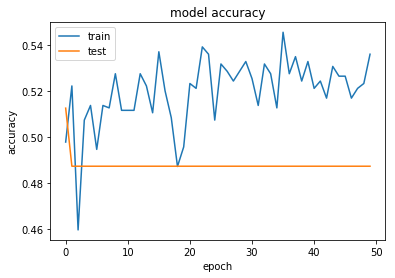

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


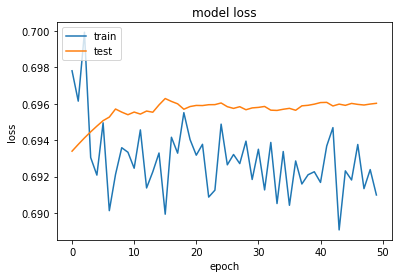

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# *********++++++*********++++++*********++++++*********++++++

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras import regularizers
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [18]:


model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(feature_dim_2,feature_dim_1), padding='causal'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
#model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.9))
model.add(Dense(2, activation='sigmoid'))


In [19]:
from keras import optimizers

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
#model.fit(x_train, y_train, batch_size=7, epochs=10)

history = model.fit(X_train, y_train_hot, batch_size=10, epochs=50, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 472 samples, validate on 119 samples
Epoch 1/50
472/472 [==============================] - 2s 4ms/step - loss: 0.7180 - acc: 0.5021 - val_loss: 0.7046 - val_acc: 0.4874
Epoch 2/50
472/472 [==============================] - 0s 674us/step - loss: 0.7064 - acc: 0.4841 - val_loss: 0.6941 - val_acc: 0.4874
Epoch 3/50
472/472 [==============================] - 0s 581us/step - loss: 0.6922 - acc: 0.5350 - val_loss: 0.6950 - val_acc: 0.4874
Epoch 4/50
472/472 [==============================] - 0s 712us/step - loss: 0.6973 - acc: 0.4979 - val_loss: 0.6935 - val_acc: 0.4874
Epoch 5/50
472/472 [==============================] - 0s 706us/step - loss: 0.6952 - acc: 0.4958 - val_loss: 0.6932 - val_acc: 0.4874
Epoch 6/50
472/472 [==============================] - 0s 678us/step - loss: 0.6909 - acc: 0.5212 - val_loss: 0.6941 - val_acc: 0.4874
Epoch 7/50
472/472 [==============================] - 0s 721us/step - loss: 0.6903 - acc: 0.5561 - val_loss: 0.6940 - val_acc: 0.4874
Epoch 8/50
472/472

In [21]:
score = model.evaluate(X_train, y_train_hot, verbose=0) 
print ("model train data score: acc       : ",round(score[1]*100) , "%")
print ("model train data score: loss      : ",round(score[0]*100) , "%")

score = model.evaluate(X_test, y_test_hot, verbose=0) 
print ("model test data score: acc        : ",round(score[1]*100) , "%")
print ("model test data score: loss       : ",round(score[0]*100) , "%")

model train data score: acc       :  82.0 %
model train data score: loss      :  29.0 %
model test data score: acc        :  50.0 %
model test data score: loss       :  199.0 %


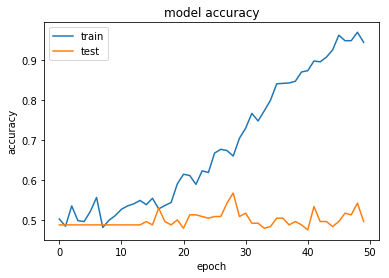

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

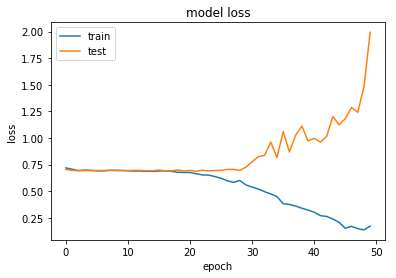

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RNN+LSTM

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [25]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True))
model.add(LSTM(units=32, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape', 'cosine'])


Build LSTM RNN model ...


In [26]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=50
MAX_BATCH=7

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(X_train, y_train_hot, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(X_test, y_test_hot),
                  callbacks=callback) 

print ("training finised!")



training started..... please wait.

Epoch 00001: loss improved from inf to 0.70156, saving model to ./best_model_trained.hdf5

Epoch 00002: loss improved from 0.70156 to 0.69100, saving model to ./best_model_trained.hdf5

Epoch 00003: loss improved from 0.69100 to 0.68312, saving model to ./best_model_trained.hdf5

Epoch 00004: loss did not improve from 0.68312

Epoch 00005: loss did not improve from 0.68312

Epoch 00006: loss did not improve from 0.68312

Epoch 00007: loss did not improve from 0.68312

Epoch 00008: loss did not improve from 0.68312

Epoch 00009: loss did not improve from 0.68312

Epoch 00010: loss improved from 0.68312 to 0.68121, saving model to ./best_model_trained.hdf5

Epoch 00011: loss did not improve from 0.68121

Epoch 00012: loss did not improve from 0.68121

Epoch 00013: loss did not improve from 0.68121

Epoch 00014: loss improved from 0.68121 to 0.68087, saving model to ./best_model_trained.hdf5

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.00

In [27]:
score = model.evaluate(X_train, y_train_hot, verbose=0) 
print ("model train data score       : ",round(score[1]*100,2) , "%")
print ("model train data loss        : ",round(score[0],2))

score = model.evaluate(X_test, y_test_hot, verbose=0) 
print ("model test data score        : ",round(score[1]*100,2) , "%")
print ("model train data loss        : ",round(score[0],2))

model train data score       :  58.69 %
model train data loss        :  0.67
model test data score        :  50.42 %
model train data loss        :  0.72


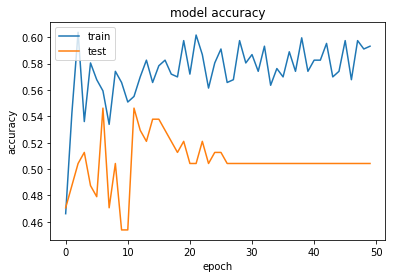

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

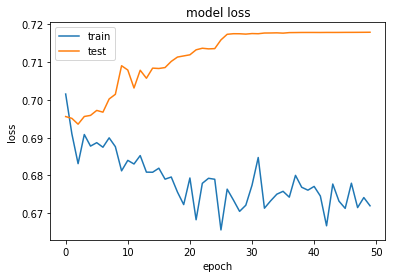

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()